<a href="https://colab.research.google.com/github/glo-code/ecommerce-analysis/blob/main/ecommerce_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import datetime

In [2]:
df=pd.read_csv('Amazon Sale Report.csv',parse_dates=True,on_bad_lines='skip',low_memory=False)
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54646,54646,406-9785595-7469909,05-27-22,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-L,Top,...,INR,518.00,BENGALURU,KARNATAKA,560102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
54647,54647,406-6749564-4974752,05-27-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3765,JNE3765-KR-L,kurta,...,INR,517.00,Bhatinda,PUNJAB,151004.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
54648,54648,403-2544081-5381152,05-27-22,Shipped,Amazon,Amazon.in,Expedited,SET293,SET293-KR-NP-XXL,Set,...,INR,736.00,GUNTUR,ANDHRA PRADESH,522003.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
54649,54649,408-4762698-8844364,05-27-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-S,Top,...,INR,0.00,NAGPUR,MAHARASHTRA,440013.0,IN,NaN,False,NaN,False




```
Indagine sui clienti


```



Ordine ID e Status

In [3]:
data=pd.to_datetime(df['Date'])
df['months']=data.dt.month_name()
df['year']=data.dt.year
df['day']=data.dt.day


group=df.groupby(['day','months','year'])[['Order ID','Status']].value_counts().reset_index()
mask=np.where(group['count']<group['count'].max())[0]
print('Order less than max:',group['count'].iloc[mask].sum(),'in the day:',group.iloc[mask])
mask2=group['count'][group['count']==group['count'].max()]
'Order == max:',mask2.value_counts(),'in the day:',group.iloc[mask2.index]


Order less than max: 54639 in the day:        day months  year             Order ID     Status  count
0        1  April  2022  403-9984530-4477124    Shipped      7
1        1  April  2022  407-3670630-4326760    Shipped      4
2        1  April  2022  404-5543645-7254764    Shipped      4
3        1  April  2022  406-9837677-6029950    Shipped      3
4        1  April  2022  406-9040211-5250700    Shipped      3
...    ...    ...   ...                  ...        ...    ...
51071   31    May  2022  405-4093728-9027538    Shipped      1
51072   31    May  2022  405-4142102-1607537  Cancelled      1
51073   31    May  2022  405-4177427-9916323    Shipped      1
51074   31    May  2022  405-4334692-2365149    Shipped      1
51075   31    May  2022  408-9910860-9722745  Cancelled      1

[51075 rows x 6 columns]


<ipython-input-3-c4cc771dfd87>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data=pd.to_datetime(df['Date'])


('Order == max:',
 count
 12    1
 Name: count, dtype: int64,
 'in the day:',
        day months  year             Order ID   Status  count
 14884   11  April  2022  403-4984515-8861958  Shipped     12)

Notiamo che il massimo di ordini da parte di un cliente è di 12 mentre il minimo è 1.Il massimo di ordini si è verificato sia ad aprile che a maggio, soltanto che a maggio si è trattato non di ordini spediti ma cancellati dallo stesso cliente.
Abbiamo invece contro i 2 ordini più alti, 91354 ordini minimi da più clienti.


In [4]:
count=group.groupby('months')['Status'].value_counts().unstack()
count=count.fillna(0).astype(int)
count

Status,Cancelled,Pending,S,Shipped,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller
months,,,,,,,,,,,
April,6695,1,0,27058,11067,2,1,2,6,848,2
March,18,0,0,123,16,0,0,0,0,1,0
May,674,0,1,3581,909,1,0,0,0,68,2


April
March
May


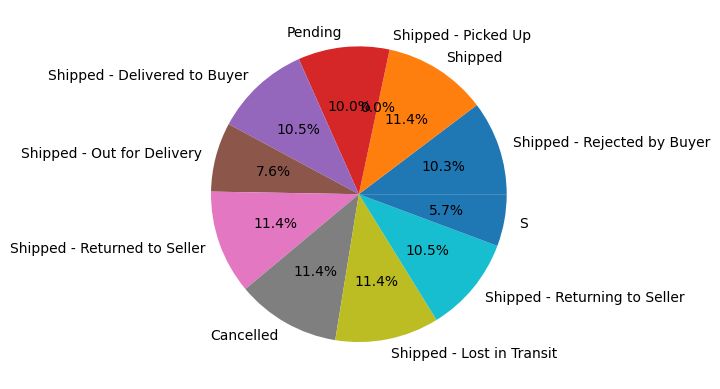

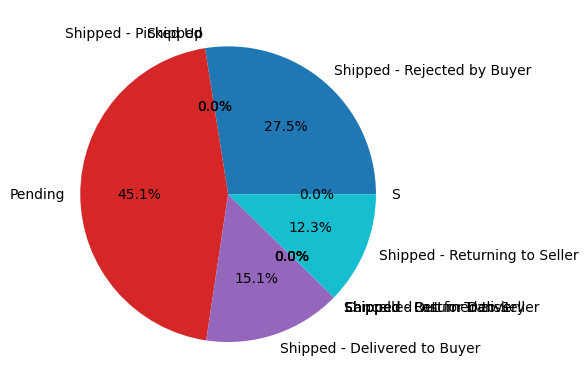

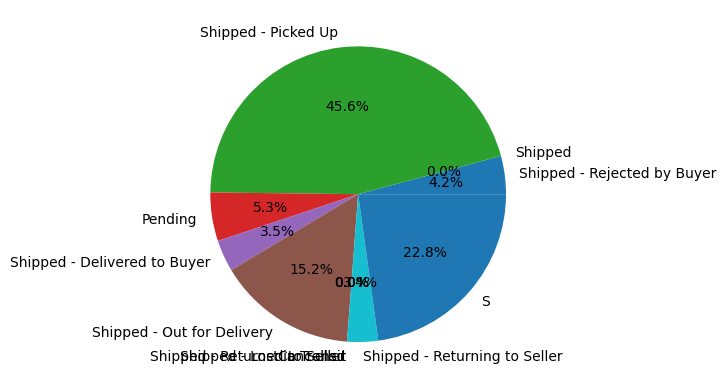

In [5]:
perc_precise=count/count.sum()*100
perc_precise.round(2).reset_index()


labels=set(df['Status'])

conteggio=0
for categorie in perc_precise:
    categorie=perc_precise.iloc[conteggio]
    print(categorie.name)
    ax,fig=plt.subplots()
    plt.pie(categorie,labels=labels,autopct='%1.1f%%')
    conteggio=conteggio+1
    if conteggio==len(perc_precise.index):
       break


Ordini per mese 0        0
1     5601
2    48879
3      171
dtype: int64
Ordini totali 54651


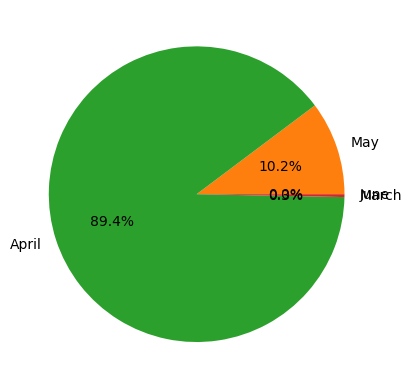

In [6]:
lista_mesi=['June','May','April','March']
ordini_totali=[]
for mese in lista_mesi:
    result=group['count'][group['months']==mese].sum()
    ordini_totali.append(result)

ordini_totali=pd.Series(ordini_totali)
print('Ordini per mese',ordini_totali)
print('Ordini totali',ordini_totali.sum())
perc=ordini_totali/ordini_totali.sum()*100
perc=perc.round(2)

ax,fig=plt.subplots()
plt.pie(perc,labels=lista_mesi,autopct='%1.1f%%')
plt.show()



Notiamo che ad Aprile abbiamo il maggior numero di ordini spediti (17.8%) e cancellati (15,5%). Abbiamo anche un modesto numero di ordini ritornati al venditore e in sospeso(16%). A giugno invece alto numero di ordini spediti ma anche cancellati anche se sono di meno rispetto ad aprile. Pochi però i resi e molti sospesi. A marzo nessun ordine sospeso e pochi cancellati ma ben il 44% degli ordini persi nel transito e 27% cancellati rispetto al 15,5% di aprile. E' il mese in cui si hanno avuti meno ordini. A maggio la maggior parte spediti e cancellati ed un numero moderato minore rispetto ad aprile di resi (21.6% rispetto al 16% di aprile). Pochi sospesi (18% rispetto ad aprile) e il 17% di persi nel transito e cancellati.

Quindi si è venduto di più tra aprile e maggio (47% e 40%) e modertamente a giugno (12%) e di meno a marzo (0.2%).



,Status,count
0,Shipped,60.01
1,Shipped - Delivered to Buyer,23.86
2,Cancelled,14.33
3,Shipped - Returned to Seller,1.76
4,Shipped - Rejected by Buyer,0.01
5,Shipped - Returning to Seller,0.01
6,Shipped - Picked Up,0.01
7,Shipped - Lost in Transit,0.01
8,Shipped - Out for Delivery,0.00
9,Pending,0.00


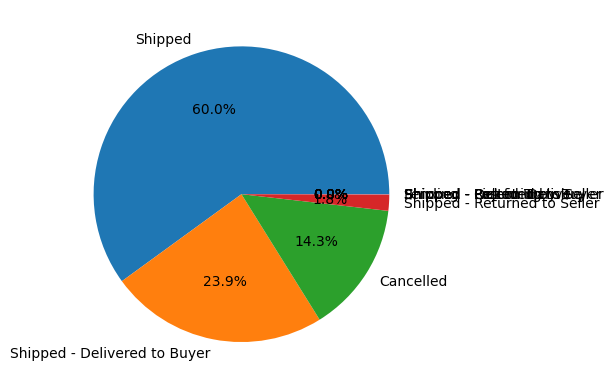

In [7]:
total=df['Status'].value_counts().sum()
status=df['Status'].value_counts().apply(lambda x:x/total*100).round(2).reset_index()
#status=status[status['count']!=0.0]
value=status['count']
fig,ax=plt.subplots()
labels=status['Status']
plt.pie(value,labels=labels,autopct='%1.1f%%')#,startangle=90,shadow=True,labeldistance=0.80,pctdistance=0.5)
status

Notiamo che la maggior parte degli ordini nei mesi indicati, sono stati spediti (circa il 58,8%) mentre il 25 % è stato spedito e consegnato al compratore. Il 14% invece è stato cancellato mentre soltanto 1.8% degli ordini è stato mandato indietro.
Soltanto per il 0,2% invece è stato effettuato il reso ma ancora l'ordine non è ritornato al venditore.



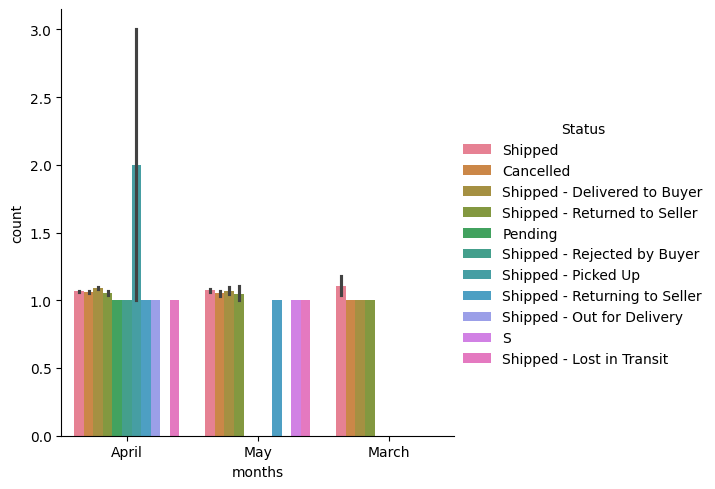

,day,months,year,Order ID,Status,count
0,1,April,2022,403-9984530-4477124,Shipped,7
1,1,April,2022,407-3670630-4326760,Shipped,4
2,1,April,2022,404-5543645-7254764,Shipped,4
3,1,April,2022,406-9837677-6029950,Shipped,3
4,1,April,2022,406-9040211-5250700,Shipped,3
...,...,...,...,...,...,...
51071,31,May,2022,405-4093728-9027538,Shipped,1
51072,31,May,2022,405-4142102-1607537,Cancelled,1
51073,31,May,2022,405-4177427-9916323,Shipped,1
51074,31,May,2022,405-4334692-2365149,Shipped,1


In [8]:

sns.catplot(group,x=group['months'],y=group['count'],kind='bar',hue='Status')
plt.show()
group

Tipo di prodotto acquistato


In [9]:
clothes=df['Category'].value_counts().reset_index()
perc_vestiti=clothes['count']/clothes['count'].sum()*100
vestiti_mesi=df.groupby('Category')['months'].value_counts().unstack()
vestiti_mesi.fillna(0).astype(int)
clothes.sum()

Category    SetkurtaWestern DressTopBlouseEthnic DressBott...
count                                                   54650
dtype: object

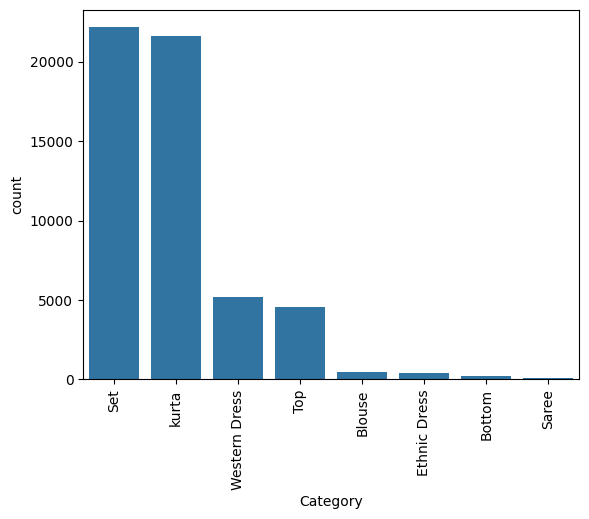

In [10]:
sns.barplot(clothes,x='Category',y='count')
plt.xticks(rotation=90)
plt.show()

Notiamo che i prodotti più acquistati in assoluto sono i set e la kurta e moderatamente il western dress e top. I prodotti meno acquistati sono ethnic dress, blouse, bottom e saree e ancora meno (soltanto 3 acquisti) il dupatta.
Dalle percentuali notiamo che il 39% acquista il set e il 38% il kurta mentre il 12% il western dress e soltanto l'8.2% il top.

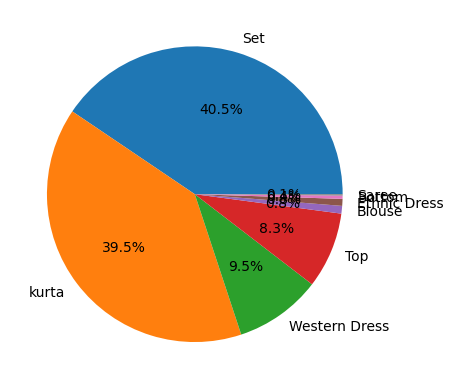

0    40.541629
1    39.542543
2     9.487649
3     8.327539
4     0.839890
5     0.755718
6     0.356816
7     0.148216
Name: count, dtype: float64

In [11]:
ax,fig=plt.subplots()
plt.pie(perc_vestiti,labels=clothes['Category'],autopct='%1.1f%%')
plt.show()
perc_vestiti

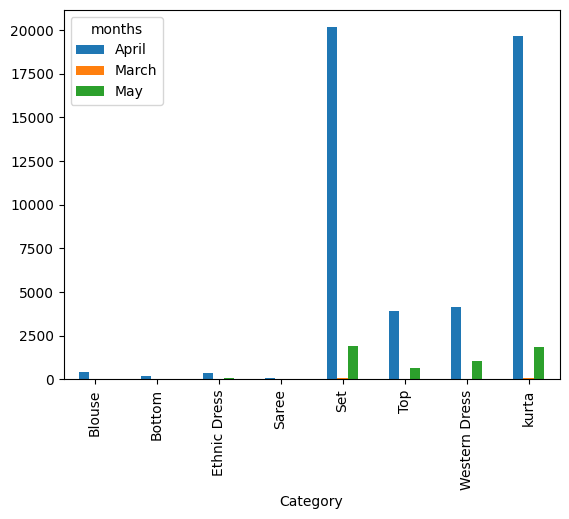

In [12]:
#ax,fig=plt.subplots()
vestiti_mesi.plot(kind='bar')
plt.show()

I set e i kurta sono stati più venduti nel mese di aprile, di più i set e i set anche nel mese di maggio sono stati più venduti rispetto ai kurta, che invece sono stati più venduti durante il mese di giugno. I top e i western dress invece hanno avuto poche vendite rispetto ai set e ai kurta ma i western dress nel mese di maggio e giugno sono stati più venduti rispetto ai top.

In [13]:

taglie=pd.crosstab(df['Category'],[df['Size']]).reset_index()
taglie.round(4)

Size,Category,3XL,4XL,5XL,6XL,Free,L,M,S,XL,XS,XXL
0,Blouse,0,0,0,0,122,58,78,74,58,18,51
1,Bottom,29,0,0,0,0,27,27,38,23,23,28
2,Ethnic Dress,59,0,0,0,0,76,65,59,67,27,60
3,Saree,0,0,0,0,81,0,0,0,0,0,0
4,Set,2441,21,17,21,0,3605,4158,3537,3235,2457,2664
5,Top,504,0,0,0,0,774,754,559,801,426,733
6,Western Dress,651,0,0,0,0,932,860,745,783,474,740
7,kurta,2675,103,124,155,0,4037,3604,2418,3795,1474,3225


<Axes: xlabel='Size'>

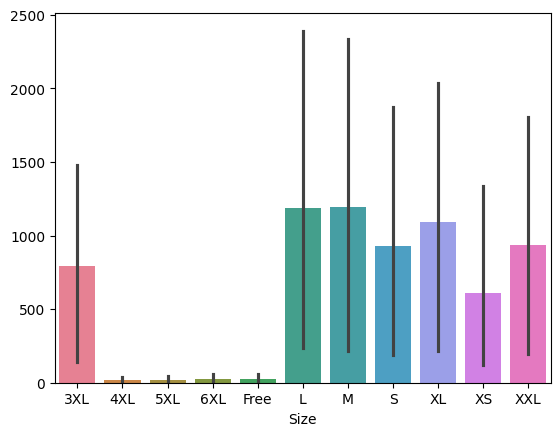

In [14]:
sns.barplot(taglie)

La taglia più venduta è la M/L mentre quella meno venduta è la XS e la 3XL. Mentre le taglie oltre la 3XL sono vendute ancora più raramente e anche la taglia Free.

Spesa


In [15]:
'Il prezzo massimo/minimo e medio sono:',df['Amount'].describe()[['max','min','mean']]
prezzo=df.groupby('months')['Amount'].mean().reset_index()
prezzo

,months,Amount
0,April,625.985619
1,March,627.678086
2,May,679.335284


In [16]:
c=df.groupby('Category')['Amount'].value_counts().unstack()
c.fillna(0).astype(int)

Amount,0.00,199.00,229.00,236.19,237.14,241.00,246.67,248.00,249.00,251.43,...,2232.00,2298.00,2299.00,2397.00,2655.00,2860.00,2864.00,4235.72,5495.00,5584.00
Category,,,,,,,,,,,,,,,,,,,,,
Blouse,10,0,1,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
Bottom,4,0,11,0,0,4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Ethnic Dress,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Saree,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Set,431,0,0,0,0,0,0,0,0,0,...,0,1,1,1,0,0,1,1,1,1
Top,66,0,0,0,0,0,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
Western Dress,61,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
kurta,352,3,6,2,4,0,6,4,43,1,...,0,0,0,0,0,0,0,0,0,0


In media i clienti spendono 648,56 dollari per acquistare la merce in totale. Il prezzo medio ad Marzo è stato 627, a Aprile 626 per poi aumentare a Maggio 663 e scendere leggermente a Giugno 661. Quindi in teoria i prezzi sono saliti tra Maggio e Giugno.

Notiamo però che la maggior parte degli acquisti di alcuni articoli sono costati 0.00 e questa è una cosa strana. Anche se notiamo che tra i kurta ben 44 siano stati venduti a 249.00 mentre 14 bottom a 229.00 e 7 blouse a 249.00 ma il resto è minore.
Perchè la maggior parte degli articoli sono stati acquistati gratis?

In [17]:
promozioni=df.groupby('promotion-ids')['Amount'].value_counts().reset_index()
vestiti_promo=df.groupby('promotion-ids')[['Category','months']].value_counts()#.reset_index()#'amount' con category
vestiti_promo_2=vestiti_promo.copy().reset_index()
print(promozioni[promozioni['count']==promozioni['count'].max()])
promo=df['promotion-ids'].value_counts()#.reset_index()
#kurta=vestiti_promo[vestiti_promo['Category']=='kurta']
#kurta[kurta['Amount']==0.0].sum()
set(promozioni[promozioni['Amount']==0.0]['promotion-ids'].value_counts().reset_index()['promotion-ids'])
#set(vestiti_promo['Sales Channel '])
#perc_promo=promo['count']/promo['count'].sum()*100
#promo_1=promo.copy()
#promo_1['count']=perc_promo.round(2)
#promo_1['count'][(promo_1['count']<57.75)&(promo_1['count']>0.0)].sum()

#print(promo.sum())


vestiti_promo.unstack().fillna(0).astype(int)




                                      promotion-ids  Amount  count
10016  IN Core Free Shipping 2015/04/08 23-48-5-108   399.0    989


months                                                            April  \
promotion-ids                                      Category               
Amazon PLCC Free-Financing Universal Merchant A... Bottom             0   
                                                   Set                0   
                                                   Top                0   
                                                   Western Dress      0   
                                                   kurta              0   
...                                                                 ...   
VPC-44571-38708638 Coupon                          Set                3   
VPC-44571-41445473 Coupon                          kurta              1   
VPC-44571-41445498 Coupon                          Set                1   
VPC-44571-41445527 Coupon                          Western Dress      1   
VPC-44571-41445561 Coupon                          Top                1   

months                                                            March  May  
promotion-ids                                      Category                   
Amazon PLCC Free-Financing Universal Merchant A... Bottom             0    1  
                                                   Set                0   14  
                                                   Top                0    4  
                                                   Western Dress      0    7  
                                                   kurta              0    7  
...                                                                 ...  ...  
VPC-44571-38708638 Coupon                          Set                0    4  
VPC-44571-41445473 Coupon                          kurta              0    9  
VPC-44571-41445498 Coupon                          Set                0    0  
VPC-44571-41445527 Coupon                          Western Dress      0    7  
VPC-44571-41445561 Coupon                          Top                0    2  

[3456 rows x 3 columns]

La promozione più utilizzata è VPC-44571-44201853, usata per circa 46100 volte,quindi si tratta di spedizione gratuita (Il numero più alto di articoli acquistati con questa promozione (1754) è costato 399.0 ed in particolare 1687 sono i kurta acquistati 49877 volte (3,38% degli acquisti)).
458 persone hanno invece utilizzato la promozione collegata alle carte platino, attraverso la quale amazon applica lo sconto sull'ordine permettendo però al venditore di ricevere il guadagno completo.
Questa promozione invece è stata utilizzata per comprare i kurta a 0.0 (291 quindi 0.58%) ma è strano perchè dovrebbe trattarsi di una promozione applicabile solo ai vendito
ri.
In generale 781 articoli sono stati venduti per 0.0 (128975 articolo in totale quindi 0,61%) ed è dovuto a tre promozioni sia questa e due coupon che dovrebbero abbassare il prezzo ma non rendere l'articolo gratuito. Sono tutte promozioni provenienti da Amazon.
In totale il 52% degli articoli sono stati comprati tramite la promozione IN Core Free Shipping 2015/04/08 23-48-5-108
come avevamo già notato mentre lo 0,57% con la promozione free-fancing ed anche sullo 0 è la percentuale dei coupon duplicates.


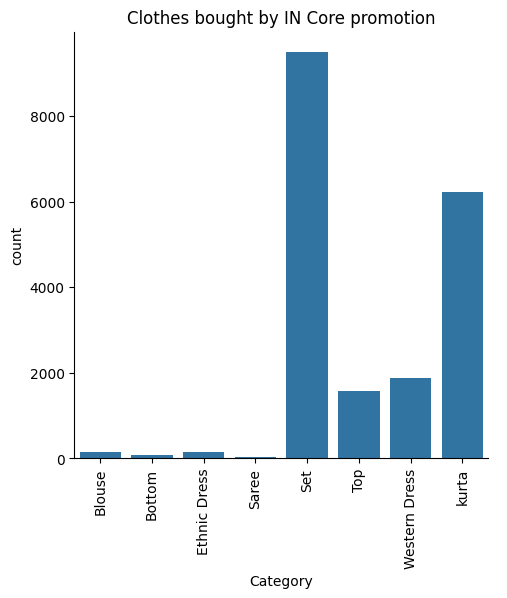

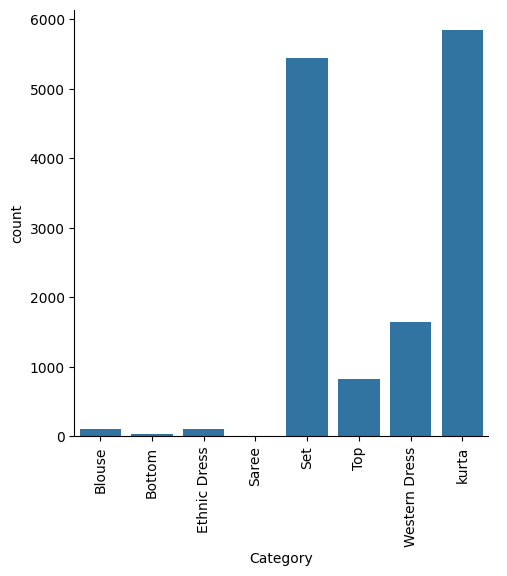

KeyboardInterrupt: 

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


Error in callback <function _draw_all_if_interactive at 0x7b26b5921000> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7b26b5920280> (for post_execute):


KeyboardInterrupt: 

In [68]:
mask=vestiti_promo_2['promotion-ids'].str.contains('IN Core')
in_core=vestiti_promo_2[['promotion-ids','count','Category','months']][mask==True]
#coupon=vestiti_promo_2[['promotion-ids','count','Category','months']][mask==False]
coupon=coupon[['promotion-ids','count','Category','months']][coupon['promotion-ids'].str.contains('Amazon')==False]

incore=in_core.groupby('Category')[['count','promotion-ids']].sum()

coupon=coupon.groupby(['Category','promotion-ids'])[['count','months']].sum()

amazon=vestiti_promo_2['promotion-ids'].str.contains('Amazon')
amazon_1=vestiti_promo_2[['promotion-ids','count','Category','months']][amazon==True]
amazon_2=amazon_1.groupby('Category')[['count','promotion-ids']].sum()





sns.catplot(incore,kind='bar',x='Category',y='count')
plt.xticks(rotation=90)
plt.title('Clothes bought by IN Core promotion')
plt.show()
sns.catplot(amazon_2,kind='bar',x='Category',y='count')
plt.xticks(rotation=90)
plt.show()
sns.catplot(coupon,kind='bar',x='Category',y='count',hue='promotion-ids')
plt.xticks(rotation=90)
plt.title('Clothes bought by other promotion')
plt.show()

coupon